## Sony Analysis
You are provided with a sample dataset of a telecom company’s customers and it's expected to done the following tasks:

- Perform exploratory analysis and extract insights from the dataset.
- Split the dataset into train/test sets and explain your reasoning.
- Build a predictive model to predict which customers are going to churn and discuss the reason why you choose a particular algorithm.
- Establish metrics to evaluate model performance.
- Discuss the potential issues with deploying the model into production.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl

In [38]:
raw = pd.read_csv('datasets/Data_Science_Challenge.csv')
raw

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [21]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

**Interesting Categorical Features**
- state, area code, international plan, voice mail plan

**Numeric Features**
- account length, number vmail messages, all of the call data variables

**Target**
- churn (bool)

In [39]:
raw.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [40]:
raw_categorical = ['state', 'area code', 'international plan', 'voice mail plan']
target = ['churn']
raw_numerical = ['number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls']

In [41]:
raw['state'].nunique()

51

In [42]:
raw['area code'].unique()

array([415, 408, 510])

Looks there are only 3 unique area codes (415 = SF Bay Area, 408 = San Jose, 510 = Oakland/East Bay). Strange that these are all in CA, but there's also all states represented.

In [43]:
# Establish one-hot encoding for area codes
processed_cats = pd.get_dummies(raw['area code'])
processed_cats = processed_cats.add_prefix('area_code_')
processed_cats


,area_code_408,area_code_415,area_code_510
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
3328,0,1,0
3329,0,1,0
3330,0,0,1
3331,0,0,1


In [58]:
# Create processed df that will replace categories with processed columns
processed = raw.drop(columns=['area code', 'state', 'phone number'])
processed = pd.concat([processed, processed_cats], axis=1)
processed

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,area_code_408,area_code_415,area_code_510
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,...,91,11.01,10.0,3,2.70,1,False,0,1,0
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,...,103,11.45,13.7,3,3.70,1,False,0,1,0
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,...,104,7.32,12.2,5,3.29,0,False,0,1,0
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,...,89,8.86,6.6,7,1.78,2,False,1,0,0
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,...,121,8.41,10.1,3,2.73,3,False,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,no,yes,36,156.2,77,26.55,215.5,126,18.32,...,83,12.56,9.9,6,2.67,2,False,0,1,0
3329,68,no,no,0,231.1,57,39.29,153.4,55,13.04,...,123,8.61,9.6,4,2.59,3,False,0,1,0
3330,28,no,no,0,180.8,109,30.74,288.8,58,24.55,...,91,8.64,14.1,6,3.81,2,False,0,0,1
3331,184,yes,no,0,213.8,105,36.35,159.6,84,13.57,...,137,6.26,5.0,10,1.35,2,False,0,0,1


In [80]:
# Change voice mail plan from yes no to 1 0
processed['voice mail plan'] = processed['voice mail plan'].replace('yes', 1)
processed['voice mail plan'] = processed['voice mail plan'].replace('no', 0)
processed['international plan'] = processed['international plan'].replace('yes', 1)
processed['international plan'] = processed['international plan'].replace('no', 0)
processed['churn'] = processed['churn'].replace(False, 0)
processed['churn'] = processed['churn'].replace(True, 1)
processed

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,area_code_408,area_code_415,area_code_510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,91,11.01,10.0,3,2.70,1,0,0,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,103,11.45,13.7,3,3.70,1,0,0,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,104,7.32,12.2,5,3.29,0,0,0,1,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,89,8.86,6.6,7,1.78,2,0,1,0,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,121,8.41,10.1,3,2.73,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,1,36,156.2,77,26.55,215.5,126,18.32,...,83,12.56,9.9,6,2.67,2,0,0,1,0
3329,68,0,0,0,231.1,57,39.29,153.4,55,13.04,...,123,8.61,9.6,4,2.59,3,0,0,1,0
3330,28,0,0,0,180.8,109,30.74,288.8,58,24.55,...,91,8.64,14.1,6,3.81,2,0,0,0,1
3331,184,1,0,0,213.8,105,36.35,159.6,84,13.57,...,137,6.26,5.0,10,1.35,2,0,0,0,1


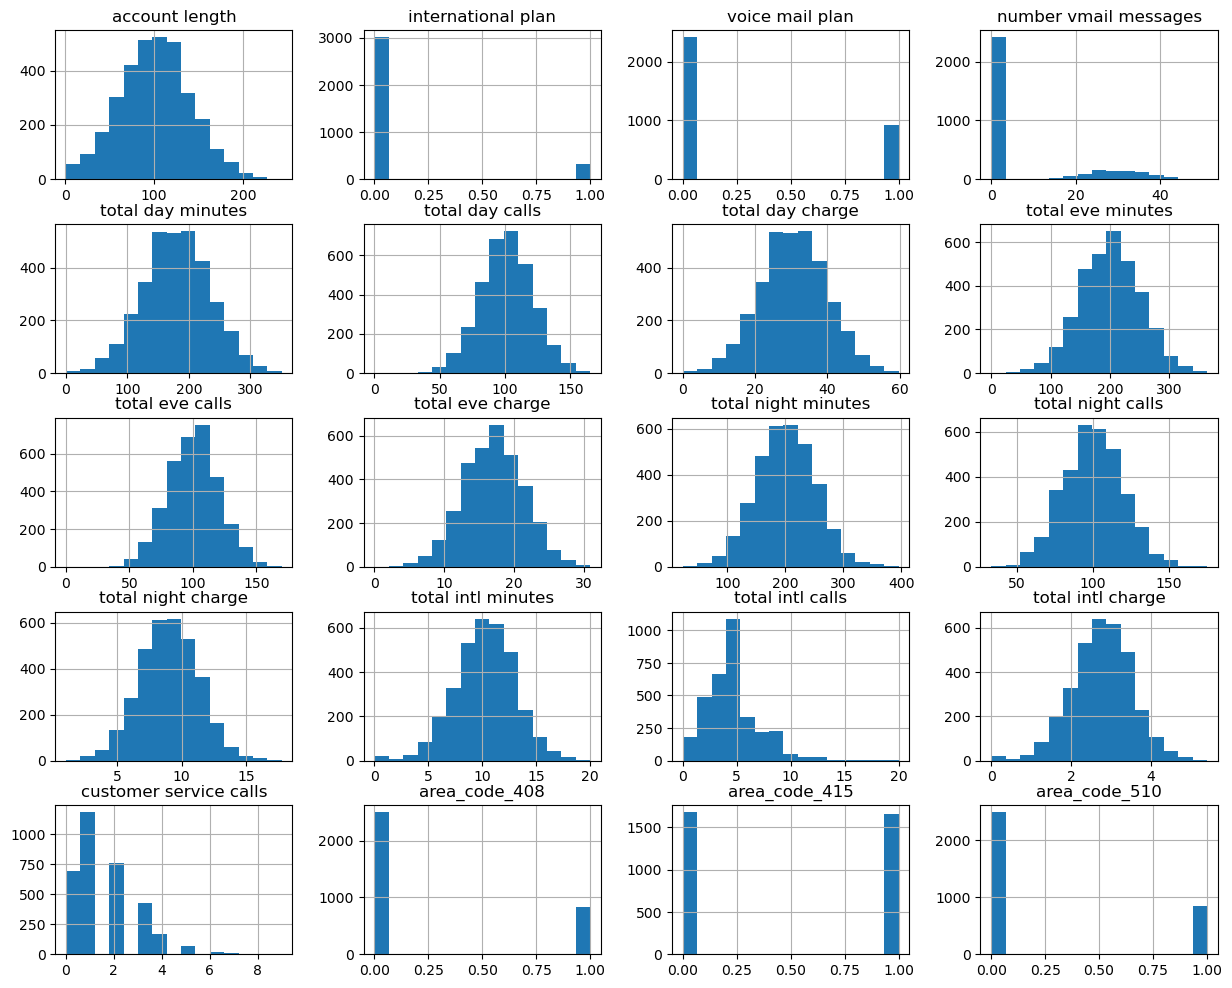

In [60]:
# Quickly visualize all of our features
processed.hist(figsize=(15,12),bins = 15)
plt.show()

Most features look relatively normally distributed except: 
- Most do not use international plan
- Very few voicemails are used
- Over double the customers do not have voice mail as do have it.
- Roughly half of customers live in area code 415

Text(0, 0.5, 'Count')

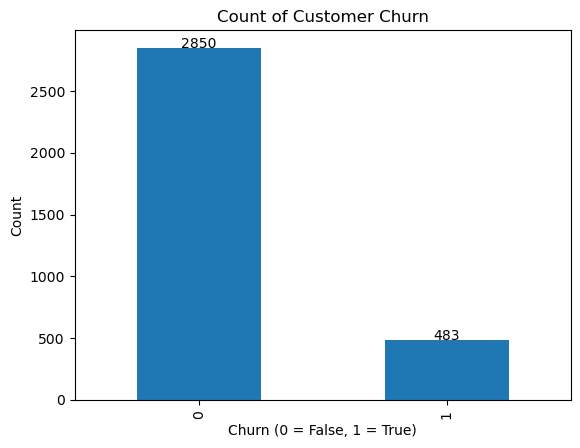

In [82]:
# What does our target variable look like
counts = processed.churn.value_counts()

# Declare color map
colormap = mpl.cm.get_cmap('tab10')
counts.plot(kind='bar', colormap=colormap)
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center')
plt.title("Count of Customer Churn")
plt.xlabel("Churn (0 = False, 1 = True)")
plt.ylabel('Count')    

The percentage of the minority class is roughly 17%, a "moderately" unbalanced class

In [79]:
minority_pct = counts[1]/counts[0]
minority_pct

0.1694736842105263

- Looks like we have a highly unbalanced data set. Will need to do some up/downsampling.
- Let's next get correlations between features

/var/folders/hc/01d9jzjj09sfrqhgs8d16plc0000gp/T/ipykernel_65975/30451048.py:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


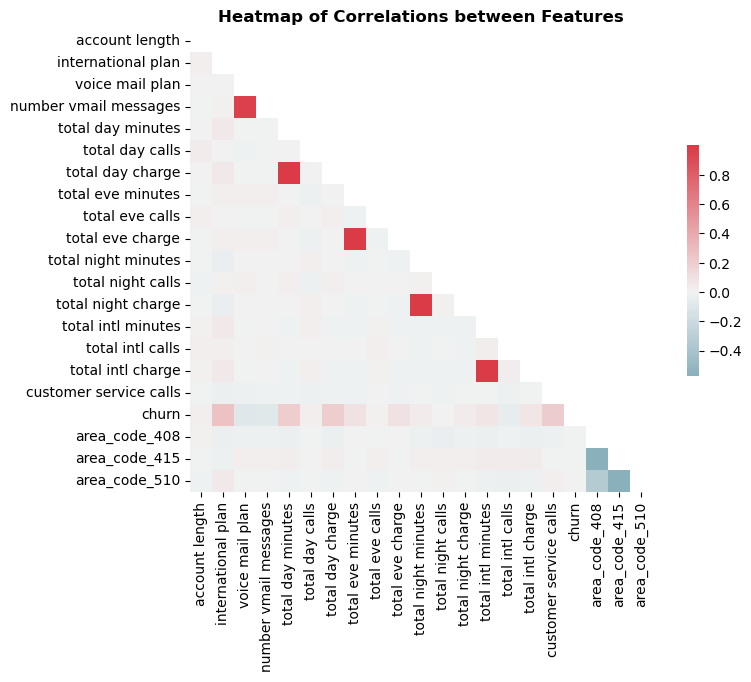

In [69]:
# Plot the correlations between features
import seaborn as sns

# Calculate the correlations amongst features 
corr = processed.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

# Create nicer lower triangular seaborn correlation heatmap. Use diverging color palette to get -1,0,1
fig, ax = plt.subplots(figsize=(9,6))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr, # Data
            mask=mask, # Mask certain cells
            cmap=cmap, # Colormap
            square=True, # Make squares
            #annot=True, # Show values
            #annot_kws={'size':6},
            #vmax=0.5, # Set scale for colors (all above will have same)
            #vmin=-0.5, # Min scale
            center=0, # Force center which is white for diverging palette
            #linewidths=0.5, # Width of line between squares
            cbar_kws={'shrink':0.5}) # Size of legend
plt.title('Heatmap of Correlations between Features', fontweight='bold')
plt.savefig('correlation_heatmap.png')

Next, we'll use a basic Random Forest to do some feature selection. 
- **Negative Correlations:** We see some negative correlation between voice mail users and churn 
- **Positive Correlations:** International plan users, total day minutes (which is weird), total day charges, and customer service calls (which makes sense) 
- **Correlations between Features:** Doesn't appear to be too much

In [90]:
from sklearn.preprocessing import StandardScaler

# Split features and target for feature selection
X = processed.drop(columns=['churn'])
y = processed.churn

# Separate data to be scaled and one hot encoded data
X_onehot = X[['international plan', 'voice mail plan',
              'area_code_408','area_code_415', 'area_code_510']]
X_scaled = X.drop(columns=['international plan', 'voice mail plan',
       'area_code_408', 'area_code_415', 'area_code_510'])

# Scale data, retaining original column titles and structure
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_scaled), columns = X_scaled.columns)

# Recombine data with the one hot encoded columns
X_scaled = pd.concat([X_scaled, X_onehot], axis=1)
X_scaled

,account length,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,international plan,voice mail plan,number vmail messages,area_code_408,area_code_415,area_code_510
0,0.676489,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,-0.427932,0,1,25,0,1,0
1,0.149065,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,-0.427932,0,1,26,0,1,0
2,0.902529,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,-1.188218,0,0,0,0,1,0
3,-0.428590,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,0.332354,1,0,0,1,0,0
4,-0.654629,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,1.092641,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,2.283878,-0.432895,-1.167924,-0.433386,0.286348,1.299506,0.286880,1.547039,-0.874374,1.547188,-0.120832,0.617898,-0.125496,0.332354,0,1,36,0,1,0
3329,-0.830437,0.942447,-2.164631,0.942714,-0.938353,-2.264816,-0.938172,-0.189297,1.170023,-0.188670,-0.228304,-0.194831,-0.231645,1.092641,0,0,0,0,1,0
3330,-1.835055,0.018820,0.426808,0.019193,1.731930,-2.114211,1.732349,-0.177431,-0.465494,-0.175486,1.383778,0.617898,1.387123,0.332354,0,0,0,0,0,1
3331,2.082955,0.624778,0.227466,0.625153,-0.816080,-0.808966,-0.815203,-1.219628,1.885562,-1.221396,-1.876211,2.243356,-1.876950,0.332354,1,0,0,0,0,1


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=123)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

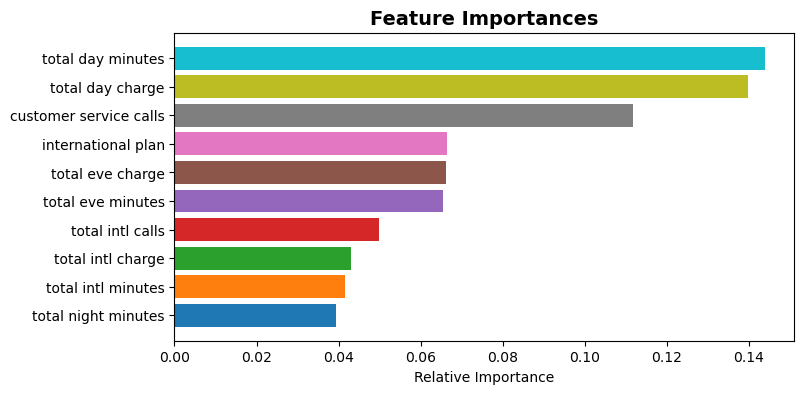

In [95]:
# Use my premade method for graphing feature importance
def graph_feature_importance(model, data):
    """
    model = trained model object from sklearn
    data = Usually X_train
    """
    importances = model.feature_importances_
    indices = np.argsort(importances)[-10:] # Get top 10 most important features
    features = data.columns
    f, ax = plt.subplots(figsize=(8, 4))
    plt.title('Feature Importances', fontweight='bold', fontsize=14)
    cmap = mpl.colormaps['tab10']
    plt.barh(range(len(indices)), importances[indices], color = colormap.colors)
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

graph_feature_importance(rf, X_train)

There appear to be 3 definitively important features: total day minutes, total day charge, and customer service calls. We should now split the data into train and test sets for model building. We'll need to stratify the sets to make sure we have the same % of churn and not churn target in our train/test sets.
- TODO: Could try doing upsampling/SMOTE

In [96]:
# Split into modeling test/train
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=123)

### Modeling (Classical ML)
- Try a handful of classical ML techniques: Logistic Regression, Support Vector Classifier, XGBoost Classifier, Random Forest for starters
- Later, we can try some deep learning with Keras/TensorFlow

In [119]:
!pip install xgboost
!pip install graphviz
!pip install pydotplus

ERROR: Could not find a version that satisfies the requirement pydotplut (from versions: none)
ERROR: No matching distribution found for pydotplut


In addition to selecting some different classical classifiers, we'll get the F1 score for each one. F1 will help balance precision and recall

In [102]:
# Import different classifiers
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

# Create library of models with default hyperparameters to be tuned later
models = {
    "LogisticRegression": LogisticRegression(),
    "SVC": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier()
}

# Train each model, keep the best one, print out results
classic_results = pd.DataFrame({"Model": [], "F1": []})
for model in models:
    temp_model = models[model]
    temp_model.fit(X_train, y_train)
    y_pred_temp = temp_model.predict(X_test)
    f1 = f1_score(y_test, y_pred_temp)
    acc = temp_model.score(X_test,y_test)
    #print(f'Model = {temp_model},  Accuracy = {f1}',  )
    new_row = pd.DataFrame({'Model': [model], 'F1': [f1], 'Accuracy': [acc]})
    classic_results = pd.concat([classic_results,new_row])

classic_results   

,Model,F1,Accuracy
0,LogisticRegression,0.243590,0.858513
0,SVC,0.000000,0.854916
0,DecisionTreeClassifier,0.644351,0.898082
0,RandomForestClassifier,0.788732,0.946043
0,XGBClassifier,0.805310,0.947242


Unsuprisingly, XGBoost performs the best on both metrics. We can do a grid search to explore the parameter space a bit.

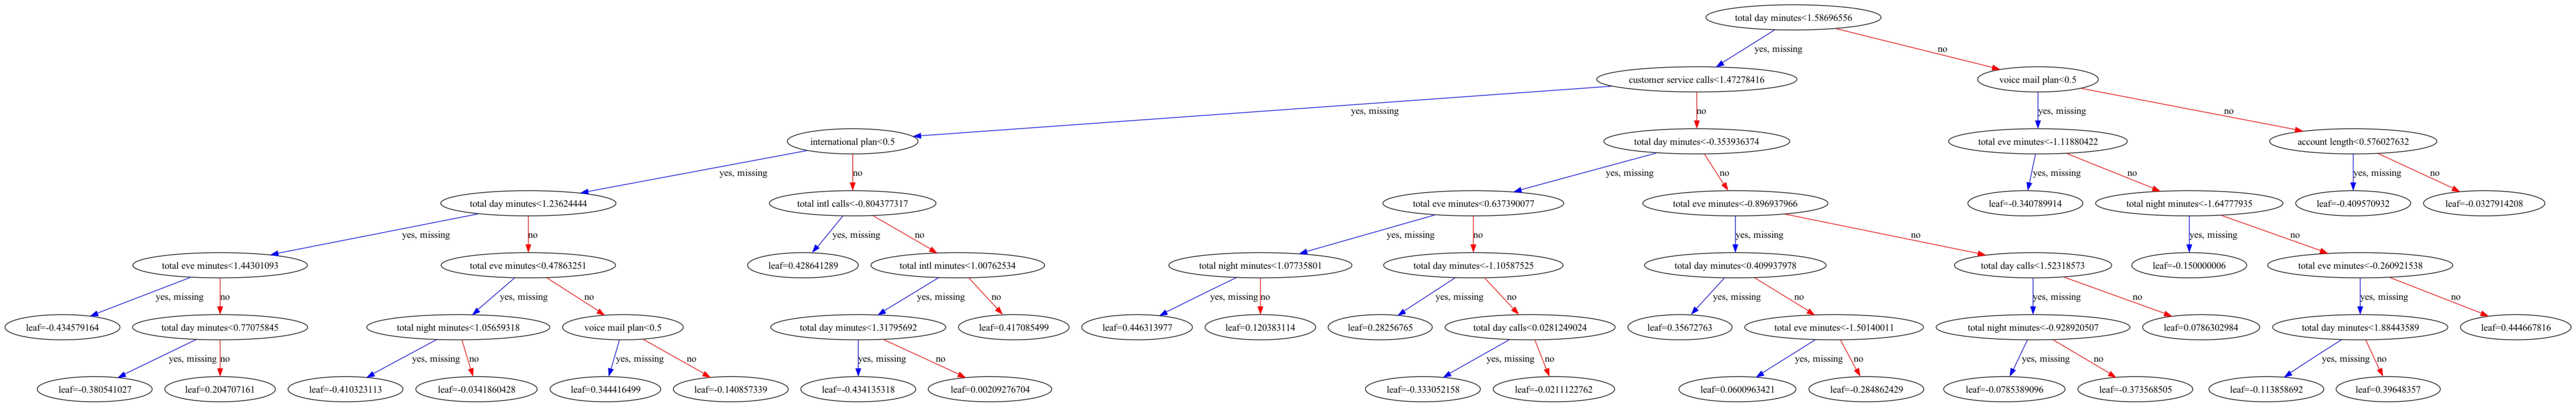

In [120]:
from xgboost import plot_tree
import graphviz
fig, ax = plt.subplots(figsize=(30, 30))
model = XGBClassifier()
model.fit(X_train, y_train)
plot_tree(model, num_trees=1, ax=ax)
fig = mpl.pyplot.gcf()
fig.set_size_inches(150, 100)
plt.show()

### Hyperparameter Tuning
- Plot learning curves to check on bias/variance
- Perform grid search over (1) Learning Rate, (2) Lambda (regularization parameter), (3) Max Depth (of trees)

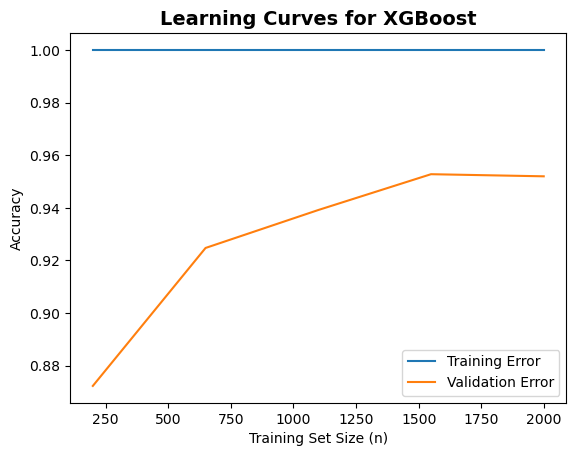

In [124]:
from sklearn.model_selection import learning_curve

# Plot learning curves with default 5-fold CV.
train_sizes, train_scores, validation_scores = learning_curve(model, X_train, y_train)

train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
#plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label='Training Error')
plt.plot(train_sizes, validation_scores_mean, label='Validation Error')
plt.title('Learning Curves for XGBoost', fontweight='bold', fontsize=14)
plt.xlabel('Training Set Size (n)')
plt.ylabel('Accuracy')
plt.legend()

Next, we perform a grid search to find hyperparameters that may increase performance. Some notes on defaults:
- Learning rate OR eta = 0.3 --> Weights to control the boosting process with each step
- gamma = 0 --> Min loss reduction required to make new leaf
- max_depth = 6 --> More depth will consume memory
- lambda = 1 --> L2 regularization term. Increasing makes more conservative/regulated

In [128]:
from sklearn.model_selection import GridSearchCV
# Create dictionary of parameters to vary. Go much smaller, than somewhat bigger than defaults.
parameters = {
    'learning_rate': [0.01, 0.03, 0.3, 1],
    'max_depth': [3, 6, 9, 12],
    'lambda': [0.1, 1, 2]

}

# Declare and fit the grid passing the model and params
xgb_grid = GridSearchCV(model, parameters, scoring='f1')
xgb_grid.fit(X_train, y_train)

# Print out the best performing hyperparameters using attributes built into XGBoost
print(f'Best F1: {xgb_grid.best_score_}')
print(f'Best Params: {xgb_grid.best_params_}')

Best F1: 0.8311143336210465
Best Params: {'lambda': 2, 'learning_rate': 0.3, 'max_depth': 9}


In [130]:
# Grab the best estiamtor from the grid search and pickle it
import pickle
filename = 'sony_xgb_best.pkl'
# Save model
with open(filename, 'wb') as file:
    pickle.dump(xgb_grid.best_estimator_, file)

### Deep Learning
- Explore basic deep learning architecture with Keras/Tensorflow

In [134]:
X.shape

(3333, 20)

In [136]:
from tensorflow import keras
import tensorflow as tf

# Create basic ANN architecture with 1 hidden layer. Feed the input shape (20 features)
basic_model = keras.models.Sequential([
    keras.layers.Dense(6, activation='relu', input_dim = X.shape[1]),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Declare Adam optimizer with custom learning rate
optimizer = keras.optimizers.Adam(learning_rate=1e-4)

# Compile the model with binary crossentropy loss and accuracy as guiding metric
basic_model.compile(
    loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

# Print out model summary
basic_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 6)                 126       
                                                                 
 dense_13 (Dense)            (None, 6)                 42        
                                                                 
 dense_14 (Dense)            (None, 1)                 7         
                                                                 
Total params: 175
Trainable params: 175
Non-trainable params: 0
_________________________________________________________________


In [137]:
# Fit the network and grab the metrics
basic_model.fit(X_train, y_train, batch_size=10, epochs=50, verbose=0)

In [138]:
loss, accuracy = basic_model.evaluate(X_train, y_train, batch_size=10)
print(f'Train Accuracy: {accuracy}')

250/250 [==============================] - 4s 9ms/step - loss: 0.3046 - accuracy: 0.8820
Train Accuracy: 0.8819527626037598


In [141]:
# Make predictions using test data
y_pred = basic_model.predict(X_test)

# Since predictions will predict probs, if they're > 0.5, predict 1, else 0
y_pred = (y_pred > 0.5)

# Get loss and accuracy from evaluating the test data
loss, accuracy = basic_model.evaluate(X_test, y_test, batch_size=10)
print(f'Test Accuracy: {accuracy}')

84/84 [==============================] - 1s 10ms/step - loss: 0.3362 - accuracy: 0.8729
Test Accuracy: 0.8729016780853271


In [143]:
# Create a confusion matrix to print the results of the classifier
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       713
           1       0.80      0.17      0.27       121

    accuracy                           0.87       834
   macro avg       0.84      0.58      0.60       834
weighted avg       0.86      0.87      0.84       834



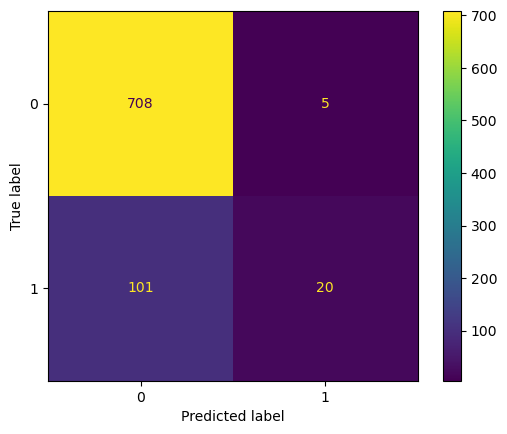

In [144]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()